## Solving Assignment 1

In [109]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from matplotlib import cm # for colormaps
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm # for progress bar
from steady_state import obj_ss_kl
import pandas as pd

from HANCModel import HANCModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
output_folder = r"output"
saved_folder = r"saved"

### 2: solve stationary equilibrium

In [93]:
model = HANCModelClass(name='A1') # create an instance of the model

ss =model.ss
par  =model.par
# Preset calibration
ss.taua = 0.1
ss.taul = 0.3
ss.G = 0.3


#### sub: problem with multiple equilibria

In [94]:

def clearing_across_kl(model,start,end,N,solveclearing='A',varlist =[ 'Y', 'C_hh','U_hh','A_hh','ELL_hh','I','K','L','B','taxa','taxl','r','w','clearing_A','clearing_C','clearing_L']):
    kl_list = np.linspace(start,end,N)
    
    out_dict = {var :np.empty(N) for var in varlist}

    model_calib = model.copy()
    for i in range(N):
        clearingi = obj_ss_kl(kl_list[i],model_calib,solveclearing)
        for key, val in out_dict.items():
            val[i] = getattr(model_calib.ss,key)
                
    return kl_list, out_dict

def plot_clearing_across_kl(kl_list,out_dict,plotvar,solveclearing='A'):
    fig = plt.figure(figsize=(12,4),dpi=100)
    ax = fig.add_subplot(1,1,1)

    ax.plot(kl_list,out_dict[plotvar])
    ax.set_xlabel('$\\frac{K}{L}$-ratio')
    ax.set_ylabel(f'{plotvar}')
    return fig


In [95]:
kl_list, clearing_list = clearing_across_kl(model,0.1,9,100)

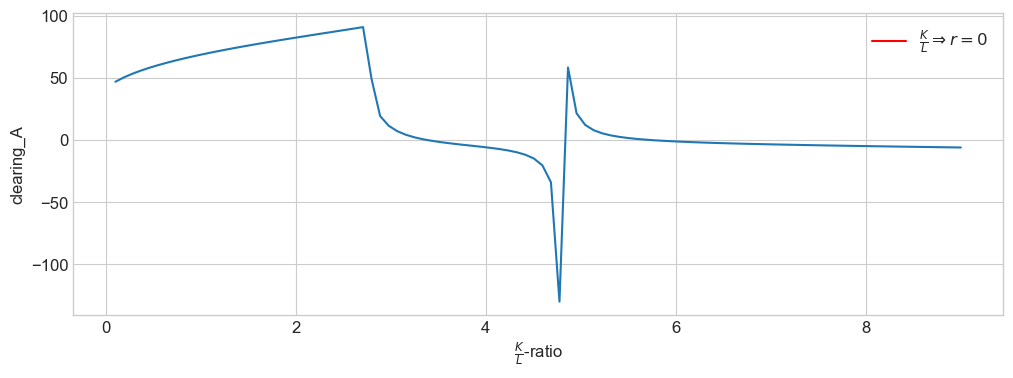

In [96]:

klguess0 = (model.par.delta/(model.par.alpha*model.ss.Gamma))**(1/(model.par.alpha-1))

fig1 = plot_clearing_across_kl(kl_list,clearing_list,'clearing_A')
ax = fig1.axes[0]
ax.axvline(klguess0, color='r', label='$\\frac{K}{L} \Rightarrow r=0$')
ax.legend();


In [97]:
fig1.savefig(output_folder+'\kl_clearing_A')

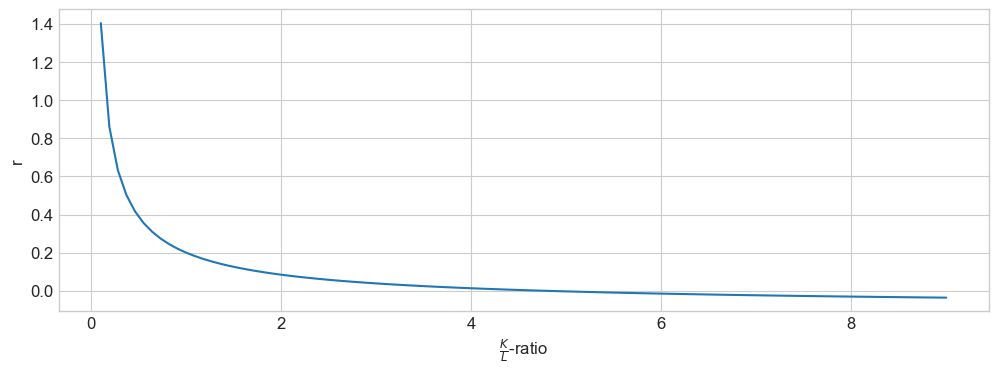

In [98]:
_ = plot_clearing_across_kl(kl_list,clearing_list,'r')

##### What happens for $\tau^{\ell}=0.1$

In [133]:
model_lowtaul = model.copy()
model_lowtaul.ss.taul=0.1

In [134]:
kl_list, clearing_list = clearing_across_kl(model_lowtaul,1.,7.,100)

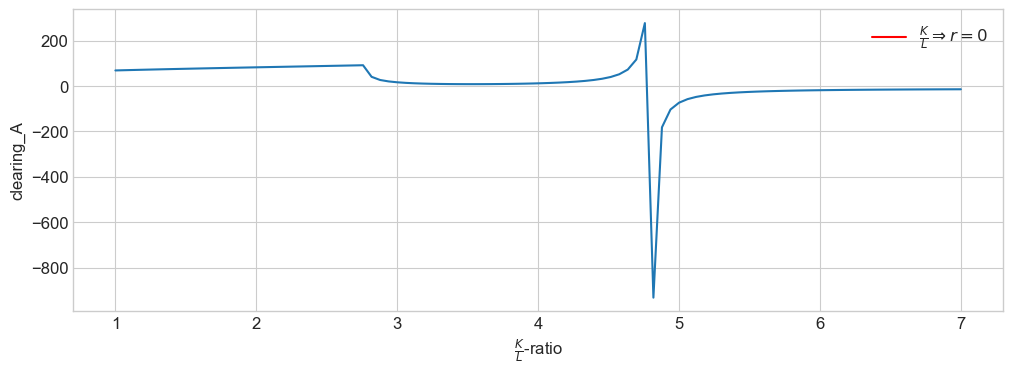

In [135]:
fig2 = plot_clearing_across_kl(kl_list,clearing_list,'clearing_A')
ax = fig2.axes[0]
ax.axvline(klguess0, color='r', label='$\\frac{K}{L} \Rightarrow r=0$')
ax.legend();


In [136]:
fig2.savefig(output_folder+'\kl_clearing_A_lowtaul')

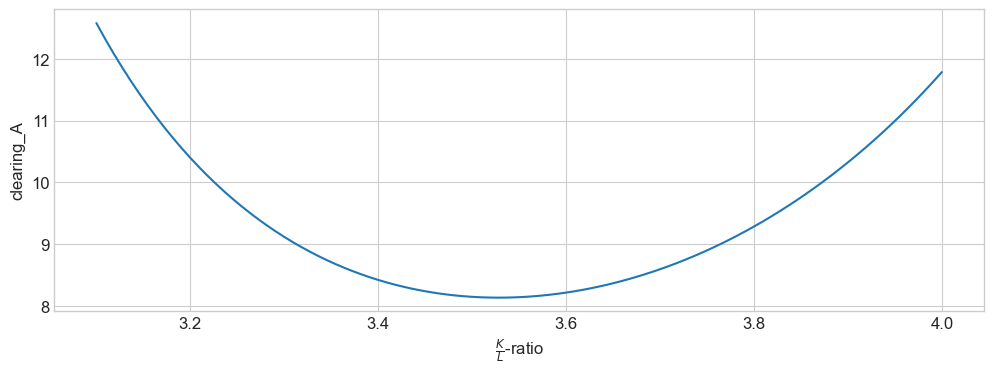

In [137]:
kl_list_zoom, clearing_list_zoom = clearing_across_kl(model_lowtaul,3.1,4.,100)
fig = plot_clearing_across_kl(kl_list_zoom,clearing_list_zoom,'clearing_A')

##### sub: what happens for $G=\tau^{a}=\tau^{\ell}=0$?

In [138]:
model_nogov = model.copy()
model_nogov.ss.taul=0.
model_nogov.ss.taua=0.
model_nogov.ss.G=0.

In [105]:
kl_list, clearing_list = clearing_across_kl(model_nogov,0.1,8.,500)

c:\Users\hms467\OneDrive - University of Copenhagen\Documents\Uni\11. semester\AMHA\AdvMacroHet\Assignments\Handin\A1_hanc\steady_state.py:283: RuntimeWarning: invalid value encountered in double_scalars
  ss.Y = ss.Gamma*ss.K**par.alpha*ss.L**(1-par.alpha)


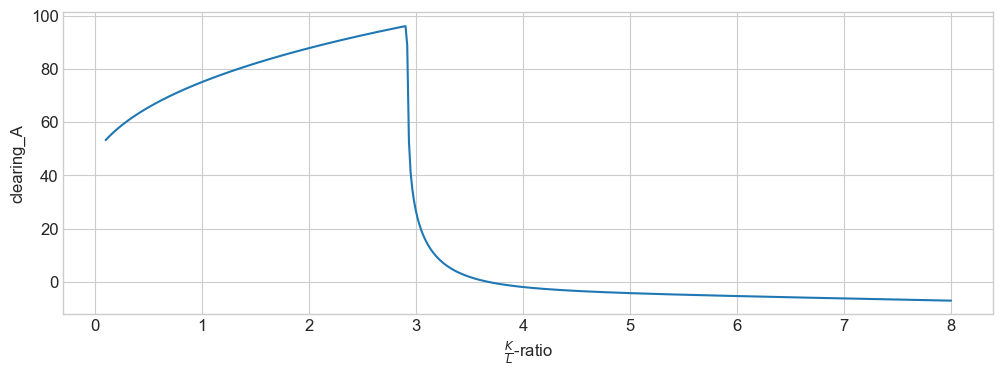

In [106]:
fig3 = plot_clearing_across_kl(kl_list,clearing_list,'clearing_A')

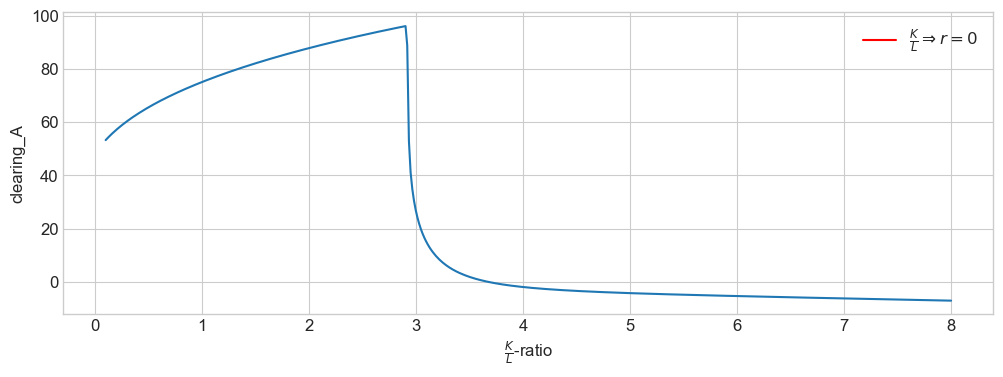

In [107]:
klguess0 = (model_copy.par.delta/(model_copy.par.alpha*model_copy.ss.Gamma))**(1/(model_copy.par.alpha-1))
ax = fig3.axes[0]
ax.axvline(klguess0, color='r', label='$\\frac{K}{L} \Rightarrow r=0$')
ax.legend()
fig3

In [108]:
fig3.savefig(output_folder+r'kl_clearing_A_nogov')

#### Aggregate quantities and prices

In [131]:
model.find_ss(method='kl',roption='positive', do_print=True)

  0: KL =   3.61241057 -> A_clearing =  -2.60377191
  1: KL =   3.45865827 -> A_clearing =  -1.02073946
  2: KL =   3.36158236 -> A_clearing =   0.23229258
  3: KL =   3.37957872 -> A_clearing =  -0.02065139
  4: KL =   3.37810942 -> A_clearing =  -0.00040865
  5: KL =   3.37807981 -> A_clearing =  -0.00000002
  6: KL =   3.37807979 -> A_clearing =   0.00000029

KL =   3.37807981 [A_clearing =  -0.00000002]

found steady state in 4.0 secs


In [132]:
for varname in model.varlist:
    print(f'{varname:15s}: {model.ss.__dict__[varname]:.4f}')

Y              : 1.4581
C              : 0.8163
I              : 0.3419
G              : 0.3000
IB             : 0.0000
Gamma          : 1.0000
K              : 3.4188
L              : 1.0120
KL             : 3.3781
B              : 0.6267
taxa           : 0.0113
taxl           : 0.3062
rk             : 0.1280
w              : 1.0086
r              : 0.0280
taua           : 0.1000
taul           : 0.3000
A_hh           : 4.0455
C_hh           : 0.8163
ELL_hh         : 1.0812
U_hh           : -2.0131
L_hh           : 1.0120
clearing_A     : 0.0000
clearing_C     : -0.0000
clearing_L     : 0.0000


In [63]:
# equilibrium with negative r
model_neg = model.copy()
model_neg.find_ss(method='kl',roption='negative', do_print=True)

  0: KL =  13.40782982 -> A_clearing = -10.10573426
  1: KL =   9.61623813 -> A_clearing =  -6.66339842
  2: KL =   7.33021206 -> A_clearing =  -4.03452256
  3: KL =   6.18719902 -> A_clearing =  -1.79188077
  4: KL =   5.61569251 -> A_clearing =   0.65888444
  5: KL =   5.76934115 -> A_clearing =  -0.22515670
  6: KL =   5.73020833 -> A_clearing =  -0.02336565
  7: KL =   5.72583228 -> A_clearing =   0.00007544
  8: KL =   5.72584636 -> A_clearing =  -0.00000030
  9: KL =   5.72584631 -> A_clearing =  -0.00000000
 10: KL =   5.72584627 -> A_clearing =   0.00000018

KL =   5.72584631 [A_clearing =  -0.00000000]

found steady state in 3.8 secs


In [64]:
for varname in model_neg.varlist:
    print(f'{varname:15s}: {model_neg.ss.__dict__[varname]:.4f}')

Y              : 1.7474
C              : 0.8546
I              : 0.5928
G              : 0.3000
IB             : 0.0000
Gamma          : 1.0000
K              : 5.9276
L              : 1.0352
KL             : 5.7258
B              : -5.7749
taxa           : -0.0002
taxl           : 0.3670
rk             : 0.0884
w              : 1.1815
r              : -0.0116
taua           : 0.1000
taul           : 0.3000
A_hh           : 0.1527
C_hh           : 0.8546
ELL_hh         : 1.1382
U_hh           : -2.0001
L_hh           : 1.0352
clearing_A     : 0.0000
clearing_C     : -0.0000
clearing_L     : 0.0000


In [139]:
# Technically bounding between 0 and the kl that makes r=0, is not valid for the nogov model, 
# but it works in this case
model_nogov.find_ss(method='kl',roption='positive', do_print=True)

  0: KL =   4.35504750 -> A_clearing =  -3.09691710
  1: KL =   3.00180634 -> A_clearing =  26.15042575
  2: KL =   4.21175669 -> A_clearing =  -2.70854722
  3: KL =   3.60678151 -> A_clearing =   0.60201273
  4: KL =   3.71679394 -> A_clearing =  -0.36027526
  5: KL =   3.67560590 -> A_clearing =  -0.03078196
  6: KL =   3.67194521 -> A_clearing =   0.00012973
  7: KL =   3.67196057 -> A_clearing =  -0.00000052
  8: KL =   3.67196051 -> A_clearing =  -0.00000000
  9: KL =   3.67196048 -> A_clearing =   0.00000020

KL =   3.67196051 [A_clearing =  -0.00000000]

found steady state in 4.7 secs


In [148]:
## Make a nice table 
varlist = ['Y', 'C', 'I', 'K', 'L', 'KL', 'B', 'taxa', 'taxl', 'w', 'r',  'A_hh', 'C_hh', 'ELL_hh', 'U_hh','taua', 'taul', 'G', 'clearing_A', 'clearing_C', 'clearing_L']

In [150]:
def g_dataframe(model,varlist=varlist):
    dict = {var: getattr(model.ss,var) for var in varlist}
    return pd.DataFrame.from_dict(dict,orient='index')


In [151]:
pd.options.display.float_format = '{:,.3f}'.format

In [152]:
df = g_dataframe(model)
df.rename(columns={0:'r>0'},inplace=True)
df['r<0'] = g_dataframe(model_neg)[0]
df['no gov'] = g_dataframe(model_nogov)[0]
df

,r>0,r<0,no gov
Y,1.458,1.747,1.364
C,0.816,0.855,1.025
I,0.342,0.593,0.339
K,3.419,5.928,3.391
L,1.012,1.035,0.923
KL,3.378,5.726,3.672
B,0.627,-5.775,-0.000
taxa,0.011,-0.000,0.000
taxl,0.306,0.367,0.000
w,1.009,1.182,1.034


#### Illustrate household behavior

#### Sub: solve across K and L

### 3: Illustrate how changes in the tax rate affect the stationary equilibria

### 4 Maximize household utility as social welfare criterion

### 5 Suggest and implement an extension which improves the tax system